In [27]:
import numpy as np
import random

np.random.seed(0)
random.seed(0)

# Q1 (b)

In [28]:
def calculate_loss(X, y, theta):
    """
    Calculate the cross-entropy loss function given X, y, and theta
    """
    f_x = X.dot(theta)
    y_probs = 1 / (1 + np.exp(-f_x))

    '''
    TODO: Implement loss calculation here
    '''
    # loss = -np.mean(y * np.log(y_probs) + (1-y) * np.log(1 - y_probs))
    loss = -np.sum(y * np.log(y_probs) + (1-y) * np.log(1 - y_probs))

    return loss


def calculate_grad(X, y, theta):
    """
    Calculate the gradient of the cross-entropy loss w.r.t. theta
    """
    f_x = X.dot(theta)
    y_probs = 1 / (1 + np.exp(-f_x))

    '''
    TODO: Implement loss calculation here
    '''
    m = X.shape[0]
    theta_grad = np.dot(X.T, (y_probs -y))
    # / m

    return theta_grad


def has_converged(loss, new_loss):
    """
    Check if the model has converged and loss remains stable.
    """
    return abs(loss - new_loss) < 0.000001


def calculate_new_theta(theta, theta_grad, alpha):
    """
    Calculate the updated theta based on theta, gradient of theta, and step size
    """
    return theta - alpha * theta_grad


In [29]:
# Please load load X and y in training set

'''
TOTO: Initialize Data.
'''
X = np.array([
    [1, -1.63, -1.36],
    [1, -1.67, -1.36],
    [1, -1.81, -2.73],
    [1, -0.82, -1.40],
    [1, -0.71, 2.95],
    [1, -0.25, 1.78],
    [1, -0.61, 0.79],
    [1, 0.49, 0.56]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1])


# Initialize parameter and hyperparameters
loss = float('inf')
new_loss = float('inf')

'''
TODO: Initlizae theta and alpha
'''
theta = np.array([-1, -1.5, 0.5])
alpha = 0.1


iters = 0

# Perform Logistic Regression
while not has_converged(loss, new_loss):
    loss = new_loss
    theta_grad = calculate_grad(X, y, theta)
    # print(theta_grad)
    new_theta = calculate_new_theta(theta, theta_grad, alpha)
    new_loss = calculate_loss(X, y, new_theta)

    theta = new_theta
    iters += 1
    # Uncomment the following line to print the loss at each step (for debugging purpose)
    # print(f"New Theta: {new_theta}, New Loss: {new_loss}, Iteration {iters}")
    # break

print(f"Final Theta: {theta}, Loss: {calculate_loss(X, y, theta)}, Total Iterations: {iters}")

[ 0.50441704 -3.55598493 -6.09547767]
New Theta: [-1.0504417  -1.14440151  1.10954777], New Loss: 3.2036181077225443, Iteration 1
Final Theta: [-1.0504417  -1.14440151  1.10954777], Loss: 3.2036181077225443, Total Iterations: 1


# Q1 (c)

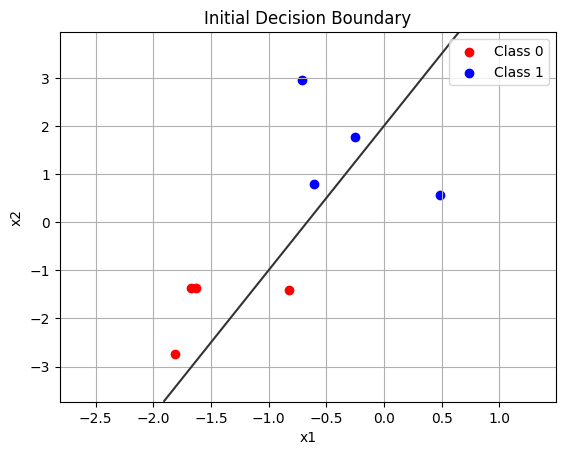

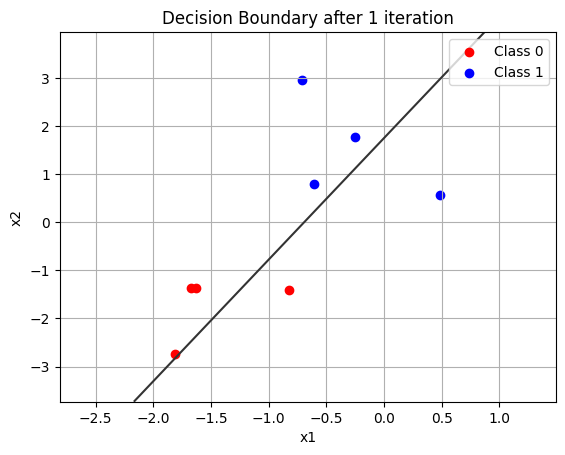

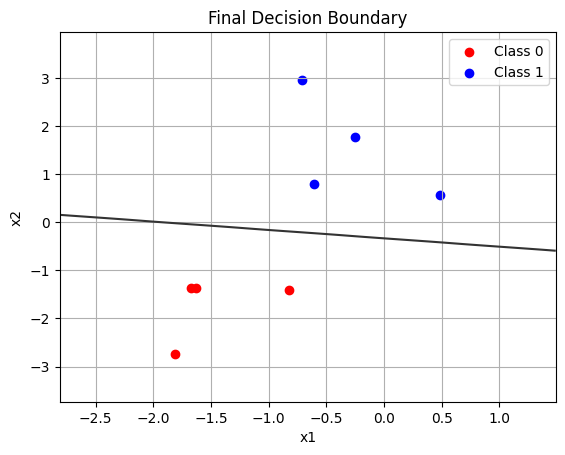

In [30]:
'''
TODO: fill in theta after one iteration, and theta after convergence.
'''
import matplotlib.pyplot as plt
theta_init = [-1.0, -1.5, 0.5]
theta_1 = [-1.00630521, -1.45555019,  0.57619347]
theta_final = [1.91250208, 0.99419732, 5.72407974]

def plot_decision_boundary(X, y, theta, title):
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid = np.insert(grid, 0, 1, axis=1)
    probs = 1 / (1 + np.exp(-np.dot(grid, theta)))
    probs = probs.reshape(xx1.shape)

    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Class 1')

    plt.contour(xx1, xx2, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=0.6)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

plot_decision_boundary(X, y, theta_init, 'Initial Decision Boundary')

plot_decision_boundary(X, y, theta_1, 'Decision Boundary after 1 iteration')

plot_decision_boundary(X, y, theta_final, 'Final Decision Boundary')

# Q1 (d)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
'''
TODO: Initialize and load the training data.
'''
X = np.array([
    [-1.63, -1.36],
    [-1.67, -1.36],
    [-1.81, -2.73],
    [-0.82, -1.40],
    [-0.71, 2.95],
    [-0.25, 1.78],
    [-0.61, 0.79],
    [0.49, 0.56]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1])


Optimized coefficients: [[0.56140902 1.17249855]]
Intercept: [0.65645172]


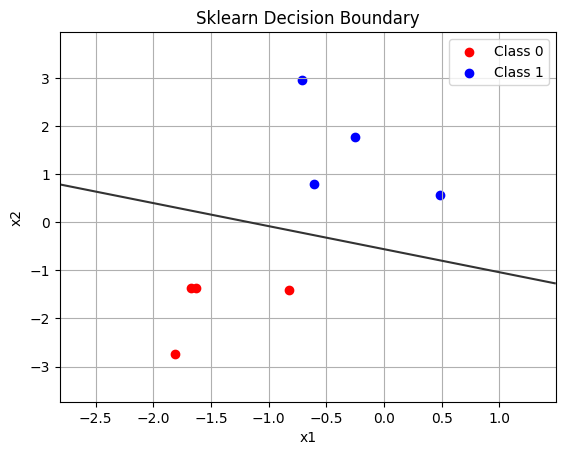

In [33]:
# Final Solution

'''
TODO: Implement logitic regression using function LogisticRegression in sklearn and print the optimized coefficient after convergence.

Hint 1: Setting a large max_iter to ensure convergence.

'''
max_iter = 100000000
model = LogisticRegression(max_iter = max_iter)
model.fit(X,y)

print("Optimized coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# theta_final = [1.91250208, 0.99419732, 5.72407974]

theta_sklearn = np.hstack([model.intercept_, model.coef_.flatten()])

def plot_decision_boundary(X, y, theta, title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid = np.insert(grid, 0, 1, axis=1)  # Add intercept term
    probs = 1 / (1 + np.exp(-np.dot(grid, theta)))
    probs = probs.reshape(xx1.shape)

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

    plt.contour(xx1, xx2, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=0.6)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

plot_decision_boundary(X, y, theta_sklearn, 'Sklearn Decision Boundary')

# Q1 (e)

In [34]:
'''
TODO: Compare your model with sklearn's model and report accuracy, precision, recall of both models.
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score

theta_final = [1.91250208, 0.99419732, 5.72407974]

X_test = np.array([
    [1, -1.90, -0.95],
    [1, -0.27, -0.87],
    [1, 0.14, -2.23],
    [1, 0.49, -0.18],
    [1, 0.97, 1.43],
    [1, 1.07, 1.30]
])

def sigmoid(z) :
  return 1/(1 + np.exp(-z))

probabilities = sigmoid(np.dot(X_test, theta_final))
y_pred = (probabilities >= 0.5).astype(int)

print(y_pred)

def createTPTNFPFN(y_test, y_pred) :
  dictionary = {
    "TP" : 0,
    "TN" : 0,
    "FP" : 0,
    "FN" : 0
  }
  for i in range(len(y_pred)) :
    if y_pred[i] == 1:
      if y_test[i] == 0 :
        dictionary["FN"] += 1
      else :
        dictionary["TP"] += 1
    else :
      if y_test[i] == 0 :
        dictionary["TN"] += 1
      else :
        dictionary["FP"] += 1

  return dictionary
y_test = np.array([0, 0, 0, 1, 1, 1])
result = createTPTNFPFN(y_test, y_pred)

print(result)
accuracy = (result["TP"] + result["TN"]) / (result["TP"] + result["TN"] + result["FP"] + result["FN"])
precision = result["TP"] / (result["TP"] + result["FP"])
recall = result["TP"] / (result["TP"] + result["FN"])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

[0 0 0 1 1 1]
{'TP': 3, 'TN': 3, 'FP': 0, 'FN': 0}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [35]:
theta_sklearn = np.hstack([model.intercept_, model.coef_.flatten()])

prob_sk = sigmoid(np.dot(X_test, theta_sklearn))
y_pred_sk = (prob_sk >= 0.5).astype(int)

print(y_pred_sk)
result = createTPTNFPFN(y_test, y_pred_sk)
print(result)

accuracy = (result["TP"] + result["TN"]) / (result["TP"] + result["TN"] + result["FP"] + result["FN"])
precision = result["TP"] / (result["TP"] + result["FP"])
recall = result["TP"] / (result["TP"] + result["FN"])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

[0 0 0 1 1 1]
{'TP': 3, 'TN': 3, 'FP': 0, 'FN': 0}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
